In [152]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns
import numpy as np

In [153]:
# Read the daily closing prices of LUV, RCL, AAPL, BA, ABT, S&P and set the `date` as a datetime index
data_luv = Path("../Random/Crypto2Stock/LUV3Y_Data.csv")
luv_df = pd.read_csv(data_luv, index_col="Date", parse_dates=True, infer_datetime_format=True)
luv_df.head()

data_abt = Path("../Random/Crypto2Stock/ABT3Y_Data.csv")
abt_df = pd.read_csv(data_abt, index_col="Date", parse_dates=True, infer_datetime_format=True)
abt_df.head()

data_inx = Path("../Random/Crypto2Stock/S&P3Y_Data.csv")
inx_df = pd.read_csv(data_inx, index_col="Date", parse_dates=True, infer_datetime_format=True)
inx_df.head()

data_aapl = Path("../Random/Crypto2Stock/AAPL3Y_Data.csv")
aapl_df = pd.read_csv(data_aapl, index_col="Date", parse_dates=True, infer_datetime_format=True)
aapl_df.head()


data_rcl = Path("../Random/Crypto2Stock/RCL3Y_Data.csv")
rcl_df = pd.read_csv(data_rcl, index_col="Date", parse_dates=True, infer_datetime_format=True)
rcl_df.head()

data_ba = Path("../Random/Crypto2Stock/BA3Y_Data.csv")
ba_df = pd.read_csv(data_ba, index_col="Date", parse_dates=True, infer_datetime_format=True)
ba_df.head()

data_gdx = Path("../Random/Crypto2Stock/GDX3Y_Data.csv")
gdx_df = pd.read_csv(data_gdx, index_col="Date", parse_dates=True, infer_datetime_format=True)
gdx_df.head()

data_gbtc = Path("../Random/Crypto2Stock/GBTC3Y_Data.csv")
gbtc_df = pd.read_csv(data_gbtc, index_col="Date", parse_dates=True, infer_datetime_format=True)
gbtc_df.head()

,Close
Date,
2017-03-20 16:00:00,0.01
2017-03-21 16:00:00,0.01
2017-03-22 16:00:00,0.01
2017-03-23 16:00:00,0.01
2017-03-24 16:00:00,0.01


In [154]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([abt_df, ba_df, aapl_df, luv_df, rcl_df, inx_df, gdx_df, gbtc_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index()

# Set column names to 'ABT' 'BA', 'AAPL', 'LUV', 'RCL', 'S&P', 'GDX', 'GBTC'
combined_df.columns = ["ABT", "BA", "AAPL", "LUV", "RCL", "S&P", "GDX", "GBTC"]

# Display a few rows
combined_df

,ABT,BA,AAPL,LUV,RCL,S&P,GDX,GBTC
Date,,,,,,,,
2017-03-20 16:00:00,44.98,179.39,141.46,53.45,97.91,2373.47,22.94,0.01
2017-03-21 16:00:00,44.80,175.96,139.84,51.88,97.05,2344.02,23.26,0.01
2017-03-22 16:00:00,44.81,176.98,141.42,52.46,98.75,2348.45,23.25,0.01
2017-03-23 16:00:00,44.77,177.26,140.92,52.37,99.35,2345.96,23.03,0.01
2017-03-24 16:00:00,44.73,175.82,140.64,52.61,98.57,2343.98,22.92,0.01
...,...,...,...,...,...,...,...,...
2020-03-11 16:00:00,78.09,189.08,275.43,42.49,44.37,2741.38,25.17,8.61
2020-03-12 16:00:00,74.74,154.84,248.23,36.07,30.27,2480.64,22.31,6.42
2020-03-13 16:00:00,81.65,170.20,277.97,41.28,32.33,2711.02,19.00,6.32


In [155]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns

,ABT,BA,AAPL,LUV,RCL,S&P,GDX,GBTC
Date,,,,,,,,
2017-03-20 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-21 16:00:00,-0.004002,-0.019120,-0.011452,-0.029373,-0.008784,-0.012408,0.013949,0.000000
2017-03-22 16:00:00,0.000223,0.005797,0.011299,0.011180,0.017517,0.001890,-0.000430,0.000000
2017-03-23 16:00:00,-0.000893,0.001582,-0.003536,-0.001716,0.006076,-0.001060,-0.009462,0.000000
2017-03-24 16:00:00,-0.000893,-0.008124,-0.001987,0.004583,-0.007851,-0.000844,-0.004776,0.000000
...,...,...,...,...,...,...,...,...
2020-03-11 16:00:00,-0.034496,-0.181507,-0.034730,-0.067384,-0.141281,-0.048868,-0.084394,-0.070194
2020-03-12 16:00:00,-0.042899,-0.181087,-0.098755,-0.151094,-0.317782,-0.095113,-0.113627,-0.254355
2020-03-13 16:00:00,0.092454,0.099199,0.119808,0.144441,0.068054,0.092871,-0.148364,-0.015576


In [156]:
# Calculate covariance of all daily returns of stocks vs. S&P 500
abt_covariance = daily_returns['ABT'].cov(daily_returns['S&P'])
ba_covariance = daily_returns['BA'].cov(daily_returns['S&P'])
aapl_covariance = daily_returns['AAPL'].cov(daily_returns['S&P'])
luv_covariance = daily_returns['LUV'].cov(daily_returns['S&P'])
rcl_covariance = daily_returns['RCL'].cov(daily_returns['S&P'])
gdx_covariance = daily_returns['GDX'].cov(daily_returns['S&P'])
gbtc_covariance = daily_returns['GBTC'].cov(daily_returns['S&P'])

print("ABT Covariance:")
print(abt_covariance)
print("BA Covariance:")
print(ba_covariance)
print("AAPL Covariance:")
print(aapl_covariance)
print("LUV Covariance:")
print(luv_covariance)
print("RCL Covariance:")
print(rcl_covariance)
print("GDX Covariance:")
print(gdx_covariance)
print("GBTC Covariance:")
print(gbtc_covariance)

ABT Covariance:
0.00013324778395086795
BA Covariance:
0.0001898376542326263
AAPL Covariance:
0.00017831916174354165
LUV Covariance:
0.00013856381484428034
RCL Covariance:
0.00019747778374091274
GDX Covariance:
-1.541519469751974e-05
GBTC Covariance:
-0.0007552071517182181


In [157]:
# Calculate variance of all daily returns of stocks vs. S&P 500
variance = daily_returns['S&P'].var()
variance

0.00014181633437034384

In [158]:
# Calculate beta of all daily returns of stocks
abt_beta = abt_covariance / variance
ba_beta = ba_covariance / variance
aapl_beta = aapl_covariance / variance
luv_beta = luv_covariance / variance
rcl_beta = rcl_covariance / variance
gdx_beta = gdx_covariance / variance
gbtc_beta = gbtc_covariance / variance

print(f"ABT: {abt_beta} | BA: {ba_beta} | AAPL: {aapl_beta} | LUV: {luv_beta}) | RCL: {rcl_beta} | GDX: {gdx_beta} | GBTC: {gbtc_beta}")

ABT: 0.939579947137121 | BA: 1.3386162819360286 | AAPL: 1.2573950845314696 | LUV: 0.977065268676528) | RCL: 1.3924896918094973 | GDX: -0.10869830168691283 | GBTC: -5.325248005254777


In [159]:
# Calculate 30-day rolling covariance of stocks vs. S&P 500 and plot the data
rolling_abt_covariance = daily_returns['ABT'].rolling(window=30).cov(daily_returns['S&P'])
rolling_ba_covariance = daily_returns['BA'].rolling(window=30).cov(daily_returns['S&P'])
rolling_aapl_covariance = daily_returns['AAPL'].rolling(window=30).cov(daily_returns['S&P'])
rolling_luv_covariance = daily_returns['LUV'].rolling(window=30).cov(daily_returns['S&P'])
rolling_rcl_covariance = daily_returns['RCL'].rolling(window=30).cov(daily_returns['S&P'])
rolling_gdx_covariance = daily_returns['GDX'].rolling(window=30).cov(daily_returns['S&P'])
rolling_gbtc_covariance = daily_returns['GBTC'].rolling(window=30).cov(daily_returns['S&P'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['S&P'].rolling(window=10).var()

# Calculate 30-day rolling beta of stocks and plot the data
rolling_abt_beta = rolling_abt_covariance / rolling_variance
rolling_ba_beta = rolling_ba_covariance / rolling_variance
rolling_aapl_beta = rolling_aapl_covariance / rolling_variance
rolling_luv_beta = rolling_luv_covariance / rolling_variance
rolling_rcl_beta = rolling_rcl_covariance / rolling_variance
rolling_gdx_beta = rolling_gdx_covariance / rolling_variance
rolling_gbtc_beta = rolling_gbtc_covariance / rolling_variance
rolling_abt_beta.tail()

Date
2020-03-11 16:00:00    0.345128
2020-03-12 16:00:00    0.305789
2020-03-13 16:00:00    0.294818
2020-03-16 16:00:00    0.321504
2020-03-17 16:00:00    0.316398
dtype: float64

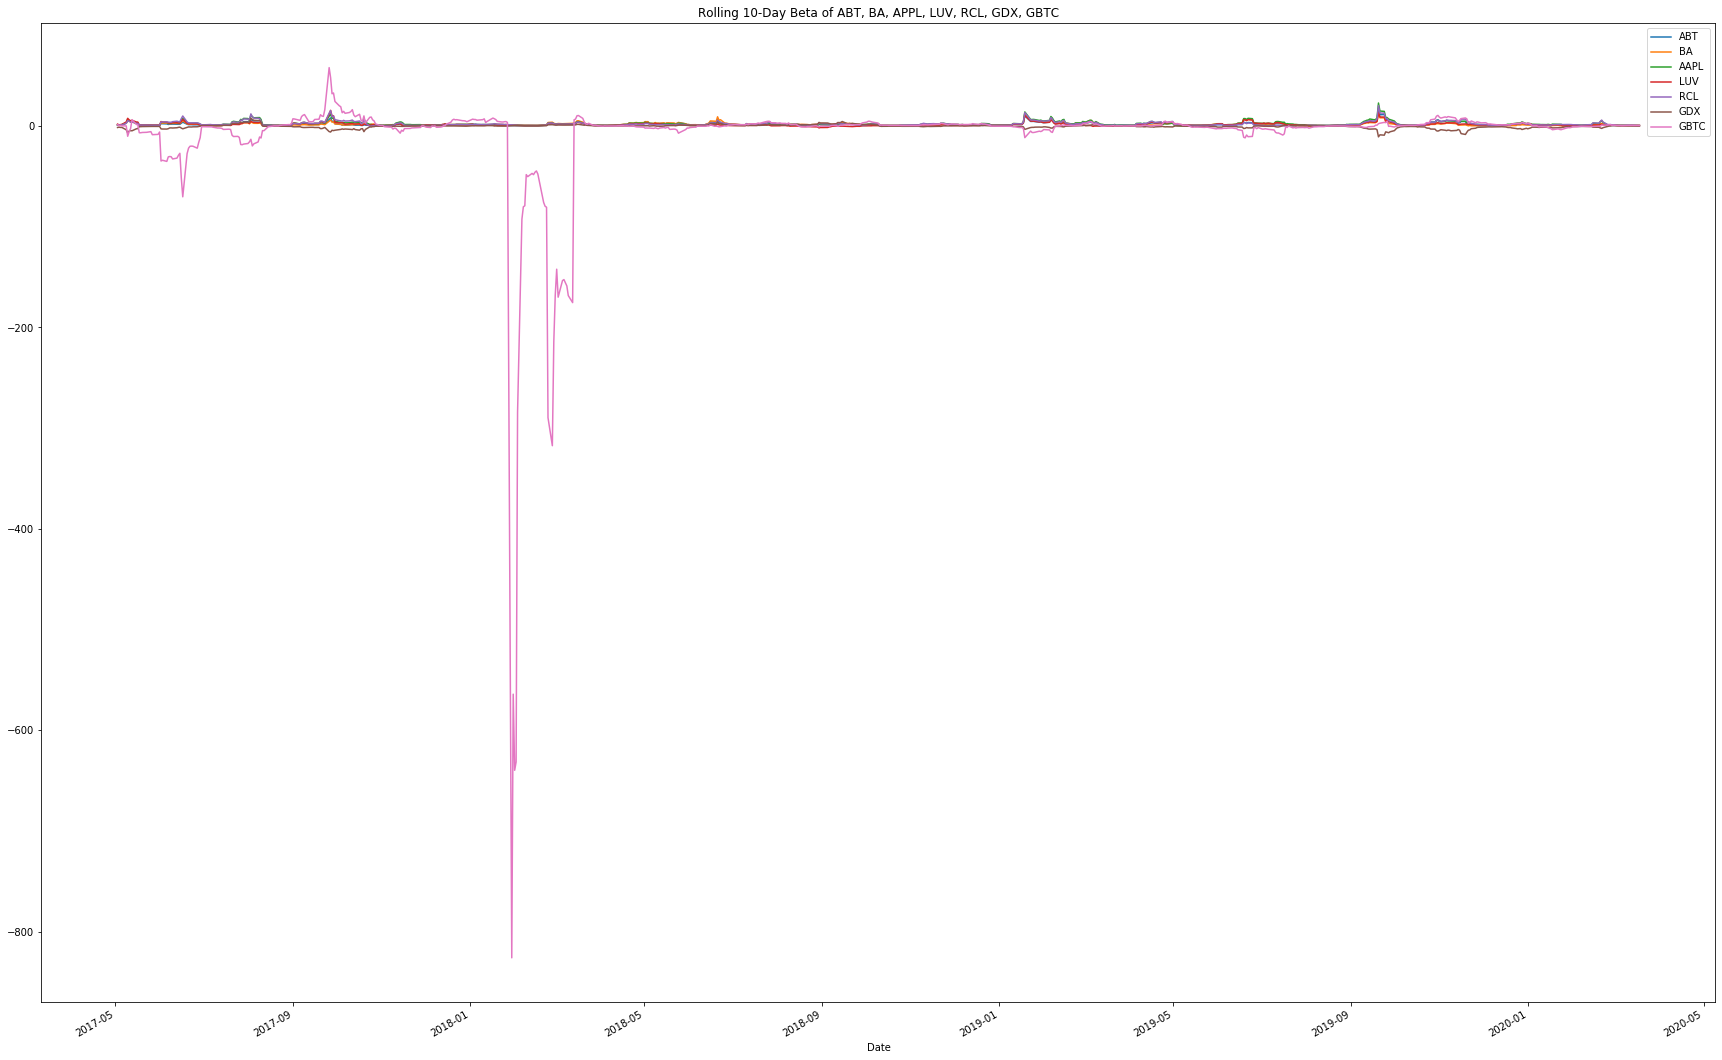

In [160]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_abt_beta.plot(figsize=(30, 20), title='Rolling 10-Day Beta of ABT, BA, APPL, LUV, RCL, GDX, GBTC')
rolling_ba_beta.plot(ax=ax)
rolling_aapl_beta.plot(ax=ax)
rolling_luv_beta.plot(ax=ax)
rolling_rcl_beta.plot(ax=ax)
rolling_gdx_beta.plot(ax=ax)
rolling_gbtc_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["ABT", "BA", "AAPL", "LUV", "RCL", "GDX", "GBTC"])

In [161]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily returnweights = [0.25, 0.25, 0.25, 0.25]
weights1 = [0.00,0.00,0.25,0.00,0.00,0.25,0.25,0.25]
portfolio_returns = daily_returns.dot(weights1)
portfolio_returns.head()

Date
2017-03-20 16:00:00         NaN
2017-03-21 16:00:00   -0.002478
2017-03-22 16:00:00    0.003190
2017-03-23 16:00:00   -0.003515
2017-03-24 16:00:00   -0.001902
dtype: float64

In [162]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns

Date
2017-03-20 16:00:00          NaN
2017-03-21 16:00:00     0.997522
2017-03-22 16:00:00     1.000704
2017-03-23 16:00:00     0.997187
2017-03-24 16:00:00     0.995291
                         ...    
2020-03-11 16:00:00    94.483769
2020-03-12 16:00:00    81.212341
2020-03-13 16:00:00    82.201896
2020-03-16 16:00:00    78.333865
2020-03-17 16:00:00    84.969629
Length: 753, dtype: float64

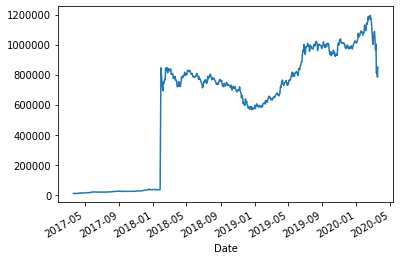

In [163]:
# Plot the returns of the portfolio in terms of money, $10,000
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

In [164]:
price_correlation = combined_df.corr()

In [165]:
import seaborn as sns

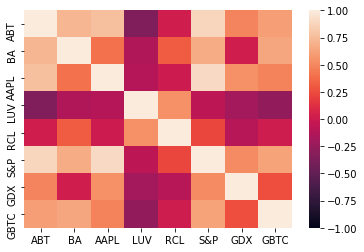

In [166]:
sns.heatmap(price_correlation, vmin=-1, vmax=1)

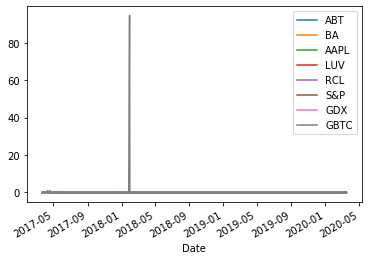

In [167]:
daily_returns.plot()

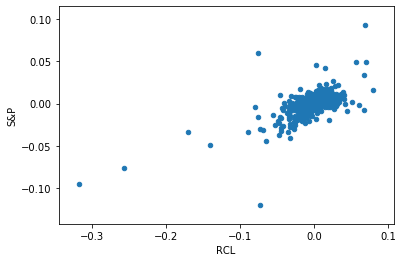

In [168]:
daily_returns.plot(kind='scatter', x='RCL', y='S&P')

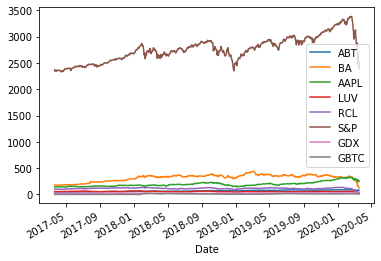

In [169]:
combined_df.plot()